# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

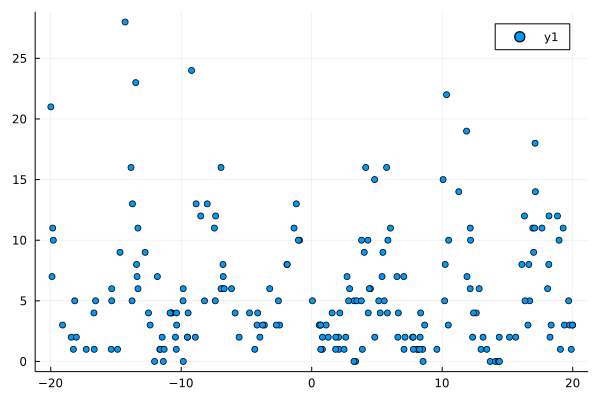

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -540.0644883420356
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.738813 seconds (6.85 M allocations: 420.984 MiB, 5.41% gc time, 97.55% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.3831176129833977, 0.3458203895445152, 0.2548992864411388, 0.30094059040713345, 0.20720425022800804, 0.42622414997857017, 0.33982005022977063, 0.18902571751446465, 0.2640241831158265, 0.2764584472913  …  0.4007071539062335, 0.4880396357952584, 0.4564221215749397, 0.2565577882862208, 0.31403438818173457, 0.1905728592159437, 0.30460682660346633, 0.19105311695603588, 0.22399605163232864, 0.17554117954038054], θ = [4.445753915752357, 3.960607125325282, 5.967722876913806, 5.955123759492466, 6.975062459606365, 3.447958993511063, 6.438163571894079, 4.486648682487172, 14.416351624642934, 7.949433591530518  …  7.894647139520404, 12.747969977842233, 2.9489822562848502, 3.4809274753522765, 2.975586334230008, 3.4894455756385794, 3.969355861635641, 3.4893925064380173, 8.464637338447595, 4.98719998072194]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTu

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -658.1688455811155
[ Info: Training ended after 20 iterations. Total number of iterations 20
  1.831639 seconds (4.32 M allocations: 301.353 MiB, 3.23% gc time, 96.16% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 12.388950440389054) infered by Analytic Variational Inference , (local_vars = (c = [0.5455082099991535, 0.49185731411563777, 0.2059140595704008, 0.43141067613155304, 0.14558377878896053, 0.5693544851776525, 0.31116437025438554, 0.21221516609604263, 0.20622505963124385, 0.21555325450428142  …  0.3868104461370183, 0.49656462385595984, 0.6211956974106503, 0.2072983732419169, 0.46945096766366873, 0.19956829181194405, 0.43820293688019973, 0.14429152436009843, 0.17566158963121772, 0.14173175436076935], θ = [5.732498126808121, 5.169194858789146, 6.332767664813385, 7.071545585280722, 7.480138870518648, 4.737749920639568, 6.613525955402332, 5.2485576256265105, 14.820507064136777, 8.32445523548592  …  7.9567564757314475, 12.627968299000685, 4.342853017883684, 3.867597628373543, 4.182425064534723, 4.217175342180892, 5.100891931307151, 4.0553623024221315, 8.966822395245378, 5.60598320568266], γ = [7.747908122724149, 7.5459792000294845, 5

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

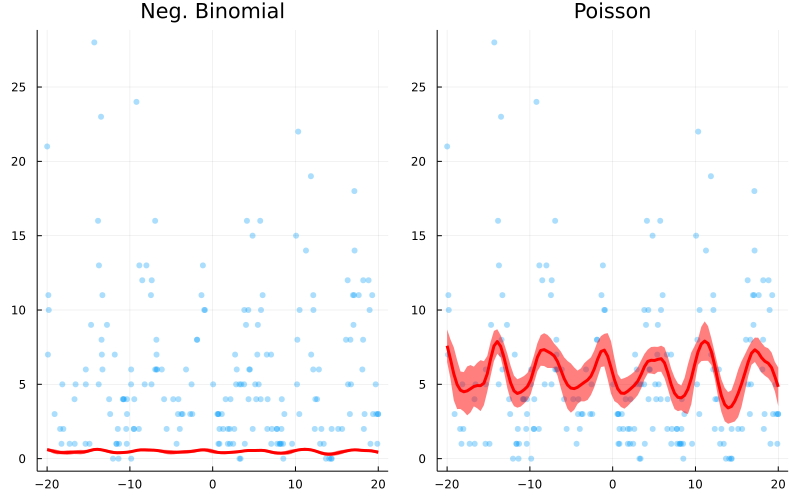

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*